In [ ]:
# Import the Dataset


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


dst = pd.read_csv('titanic_simplified.csv')

dst.head()
# dst.describe()
# # print(dst)

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


In [3]:
# Number of passengers

num_rows, num_columns = dst.shape
print("The Number of passengers is: ", num_rows)

The Number of passengers is:  891


In [9]:
# Mean age of the passengers
dst["Age"].mean()

29.789191919191918

In [11]:
# Number of passengers above 70 years old

# Get a bool series representing which row satisfies the condition i.e. True for
# row in which value of 'Age' column is more than 70
slicing_age = dst.apply(lambda x: True if x['Age'] > 70 else False , axis=1)

# Count number of True in series
numOfRows = len(slicing_age[slicing_age == True].index)
print('Number of Rows in dataframe in which Age > 70 : ', numOfRows)

Number of Rows in dataframe in which Age > 70 :  8


In [175]:
# Proportion of each class of passenger


# Get distinct Passenger classes in prsCls, and thier corresponding frequencies in frq
(prsCls, frq) = np.unique(dst["Pclass"], return_counts=True)

tlCls = len(dst["Pclass"])


# Divide frequency of passenger classes by total frequency to get relative frequency (Proportion)
# Multiplied by 100 to show percentages
proportions = np.asarray((prsCls, (frq/tlCls)*100)).T

print(proportions)

[[ 1.         24.24242424]
 [ 2.         20.65095398]
 [ 3.         55.10662177]]


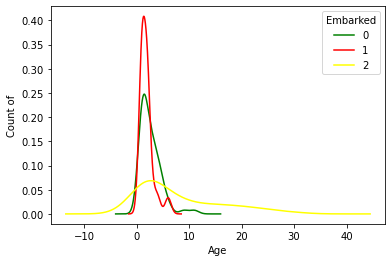

In [173]:
# Age distribution of the passengers depending on the port of embarkment (density plots)

plot_data = dst.groupby(['Age', 'Embarked']).size().reset_index().pivot(index='Age', columns='Embarked', values=0)


plot_data.plot(kind='density', stacked=True, color=['green', 'red','yellow'])
plt.ylabel('Count of')
plt.xlabel('Age')
plt.show()

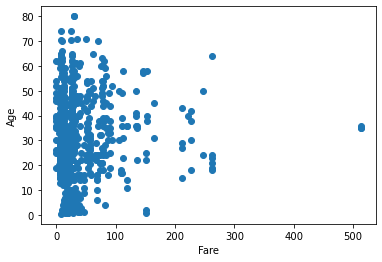

In [4]:
# Fare vs. age (scatter plot)

plt.scatter(dst['Fare'], dst['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

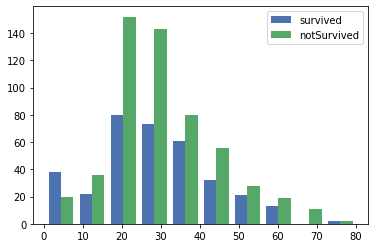

In [80]:
# Age distribution of the passengers who survided/did not survive (histogram)

survived = dst.apply(lambda x: x['Age'] if x['Survived'] == True else False , axis=1)
survived = survived[survived != False]


notSurvived = dst.apply(lambda x: x['Age'] if x['Survived'] == False else True , axis=1)
notSurvived = notSurvived[notSurvived != True]


plt.style.use('seaborn-deep')
plt.hist([survived, notSurvived], label=['survived', 'notSurvived'])
# plt.hist([survived], alpha=0.5, label=['survived'])
# plt.hist([notSurvived], alpha=0.5, label=['notSurvived'])
plt.legend(loc='upper right')
plt.show()

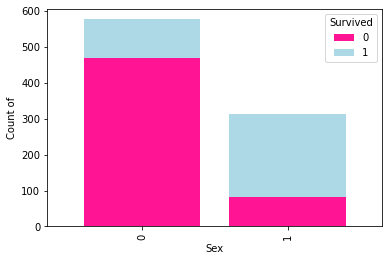

In [146]:
# Repartition of survivals among men and women (stacked bars)

plot_data = dst.groupby(['Sex', 'Survived']).size().reset_index().pivot(index='Sex', columns='Survived', values=0)
# print(plot_data)
plot_data.plot(kind='bar', stacked=True, color=['deeppink', 'lightblue'], width=0.8)
plt.ylabel('Count of')
plt.show()


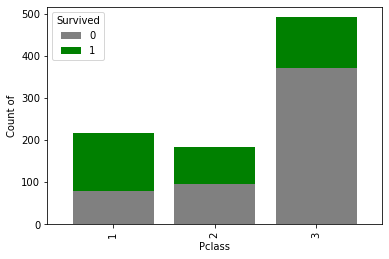

In [147]:
# Repartition of survivals for each class (stacked bars)


plt_dst = dst.groupby(['Pclass', 'Survived']).size().reset_index().pivot(index='Pclass', columns='Survived', values=0)
# print(plt_dst)
plt_dst.plot(kind='bar', stacked=True, color=['gray', 'green'], width=0.8)
plt.ylabel('Count of')
plt.show()

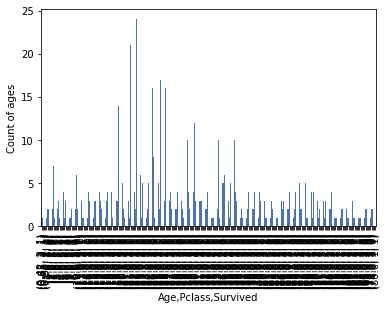

In [186]:
df_plot = dst.groupby(['Age', 'Pclass', 'Survived']).size()
df_plot.plot(kind='bar')
plt.ylabel('Count of ages')
plt.show()